In [29]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


# Se levanta el split hecho en el NoteBook anterior

In [30]:
X_train = pd.read_csv("X_train")
X_train.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,ciudad_2,ciudad_3,ciudad_4,ciudad_5,ciudad_6,ciudad_7,ciudad_8,ciudad_9,ciudad_10,anio_publ
0,0.0,3.0,2.0,3.0,196.0,160.0,NaN,NaN,NaN,0.0,...,0,1,1,0,1,1,1,1,1,2014
1,20.0,4.0,2.0,2.0,245.0,196.0,104734.0,NaN,NaN,0.0,...,0,0,0,0,1,0,0,0,0,2012
2,5.0,3.0,1.0,2.0,108.0,120.0,58952.0,NaN,NaN,0.0,...,1,0,0,1,0,0,1,0,1,2015
3,10.0,3.0,1.0,3.0,200.0,147.0,49066.0,NaN,NaN,0.0,...,0,0,0,1,0,1,0,1,0,2016
4,NaN,NaN,0.0,NaN,NaN,250.0,24892.0,19.23339,-99.166991,0.0,...,0,0,0,0,1,1,0,1,0,2016


In [31]:
X_test = pd.read_csv("X_test")

In [32]:
y_train = pd.read_csv("y_train")

In [33]:
y_test = pd.read_csv("y_test")

# Se levantan todos los XGBoost guardados

In [34]:
xgb_created = []

## Atencion! n tiene que coincidir con la cantidad guardada!

In [35]:
n = 100

In [36]:
for i in range(n):
    current_xgb = xgb.XGBRegressor()
    current_xgb.load_model("xgb_{}".format(i))
    xgb_created.append(current_xgb)

# Se arma el DF de precios para entrenar el RF

In [37]:
RF_train = pd.DataFrame(index = X_train.index.copy())

In [38]:
for i in range(n):
    current_price_pred = xgb_created[i].predict(X_train)
    RF_train['pred_{}'.format(i)] = current_price_pred
    print("xgb_{} finished pred".format(i))
RF_train.head()

xgb_0 finished pred
xgb_1 finished pred
xgb_2 finished pred
xgb_3 finished pred
xgb_4 finished pred
xgb_5 finished pred
xgb_6 finished pred
xgb_7 finished pred
xgb_8 finished pred
xgb_9 finished pred
xgb_10 finished pred
xgb_11 finished pred
xgb_12 finished pred
xgb_13 finished pred
xgb_14 finished pred
xgb_15 finished pred
xgb_16 finished pred
xgb_17 finished pred
xgb_18 finished pred
xgb_19 finished pred
xgb_20 finished pred
xgb_21 finished pred
xgb_22 finished pred
xgb_23 finished pred
xgb_24 finished pred
xgb_25 finished pred
xgb_26 finished pred
xgb_27 finished pred
xgb_28 finished pred
xgb_29 finished pred
xgb_30 finished pred
xgb_31 finished pred
xgb_32 finished pred
xgb_33 finished pred
xgb_34 finished pred
xgb_35 finished pred
xgb_36 finished pred
xgb_37 finished pred
xgb_38 finished pred
xgb_39 finished pred
xgb_40 finished pred
xgb_41 finished pred
xgb_42 finished pred
xgb_43 finished pred
xgb_44 finished pred
xgb_45 finished pred
xgb_46 finished pred
xgb_47 finished pred
xg

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,...,pred_90,pred_91,pred_92,pred_93,pred_94,pred_95,pred_96,pred_97,pred_98,pred_99
0,1.745110e+06,1.776578e+06,1.759363e+06,1.789799e+06,1803096.750,1794881.625,1765052.000,1.727619e+06,1716574.250,1.810606e+06,...,1888601.250,1692887.000,1725935.375,1.772575e+06,1.693145e+06,1.753522e+06,1818548.500,1.709631e+06,1772830.250,1732509.125
1,1.677027e+06,1.676868e+06,1.725085e+06,1.857356e+06,1785611.250,1942741.625,1894017.500,1.810985e+06,1715770.125,1.775799e+06,...,1667189.000,1861222.125,1863965.875,1.820644e+06,1.825521e+06,1.873893e+06,1756283.250,1.671295e+06,1530066.875,1728602.250
2,8.884498e+05,7.692881e+05,8.457113e+05,7.525729e+05,859144.750,872603.375,832097.125,8.372042e+05,866462.375,8.614318e+05,...,822709.375,811796.750,780307.000,9.126533e+05,9.297936e+05,9.113916e+05,891886.875,8.719924e+05,779655.500,834343.250
3,1.972208e+06,1.825292e+06,2.047250e+06,1.800743e+06,1772772.125,1932707.875,1995885.375,1.661425e+06,1782341.000,1.844030e+06,...,1910157.625,1795638.375,1861306.125,1.846068e+06,1.935220e+06,1.952258e+06,1835672.375,1.834868e+06,1904860.000,1909845.125
4,2.287896e+06,2.700138e+06,2.457574e+06,3.174352e+06,3400220.000,3444323.500,3181915.000,3.047816e+06,2531060.000,3.220464e+06,...,3328285.250,2087725.750,3151530.250,3.248340e+06,3.085773e+06,2.921334e+06,3215287.250,3.154581e+06,2933137.250,2574590.250


In [39]:
len(RF_train)

168000

In [40]:
len(y_train)

168000

## Exporto el RF_train para poder buscar hiperparametros

In [41]:
RF_train.to_csv("RF_train", index = False)

# Entreno el randomForest con RF_train

In [43]:
model_RF = RandomForestRegressor(n_estimators = 400, min_samples_split = 12,
 min_samples_leaf = 4,
 max_features = 0.4,
 max_depth = 160,
 bootstrap = True,  n_jobs= -1, random_state = 0)

model_RF.fit(RF_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=160,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Testeo el modelo final

## Armo el DF para X_test

In [44]:
RF_test = pd.DataFrame(index = X_test.index.copy())


In [45]:
for i in range(n):
    current_price_pred = xgb_created[i].predict(X_test)
    RF_test['pred_{}'.format(i)] = current_price_pred
RF_test.head()

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,...,pred_90,pred_91,pred_92,pred_93,pred_94,pred_95,pred_96,pred_97,pred_98,pred_99
0,1.380806e+06,1.463927e+06,1.448907e+06,1.416025e+06,1.370440e+06,1.410869e+06,1.586240e+06,1456668.125,1.544278e+06,1.539116e+06,...,1.489576e+06,1541273.500,1.394472e+06,1.517254e+06,1.580514e+06,1.447522e+06,1.349605e+06,1.522770e+06,1.363645e+06,1.329196e+06
1,2.556388e+06,2.768389e+06,2.552849e+06,2.438561e+06,2.767760e+06,2.550249e+06,2.597775e+06,2615363.000,2.559068e+06,2.695510e+06,...,2.643502e+06,2569743.750,2.518726e+06,2.900672e+06,2.393429e+06,2.703122e+06,2.703844e+06,2.658439e+06,2.556879e+06,2.577690e+06
2,2.944110e+06,2.637914e+06,2.704330e+06,2.543247e+06,2.722268e+06,2.682882e+06,2.938370e+06,3094203.500,2.730472e+06,2.866950e+06,...,2.211824e+06,2782141.250,2.583823e+06,2.804232e+06,2.983594e+06,2.918769e+06,2.945743e+06,2.502595e+06,3.112762e+06,3.124448e+06
3,1.564265e+06,1.367063e+06,1.359092e+06,1.463930e+06,1.402914e+06,1.529174e+06,1.538432e+06,1365402.250,1.477500e+06,1.469622e+06,...,1.506336e+06,1597715.125,1.480935e+06,1.528117e+06,1.609106e+06,1.497550e+06,1.673624e+06,1.530122e+06,1.479498e+06,1.444640e+06
4,3.915857e+05,2.506551e+05,3.743048e+05,2.194322e+05,3.333820e+05,2.446380e+05,1.217223e+05,275964.375,2.393867e+05,6.044552e+04,...,3.129240e+05,213550.125,2.075268e+05,1.861966e+05,2.666352e+05,2.001081e+05,2.673942e+05,1.992115e+05,2.677268e+05,3.070562e+05


## Se hacen las dos predicciones necesarias

In [46]:
pred_train = model_RF.predict(RF_train)
pred_test = model_RF.predict(RF_test)

### Metrica de Mean Absolute Error (La de Kaggle) ?? (Hay que preguntar)

In [47]:
mae_train = np.sqrt(sklearn.metrics.mean_absolute_error(y_train, pred_train))
mae_test = np.sqrt(sklearn.metrics.mean_absolute_error(y_test, pred_test))
#print(f"MAE train: {mea_train:.5f}")
#print(f"MAE test: {mea_test:.5f}")
print("MAE train: "+str(mae_train))
print("MAE test: "+str(mae_test))

MAE train: 551.411114492983
MAE test: 765.8645905597958


In [48]:
model_RF.feature_importances_

array([0.0062905 , 0.00218261, 0.03106739, 0.00360544, 0.00186545,
       0.00556954, 0.00275489, 0.00178708, 0.00504851, 0.00158386,
       0.00156605, 0.00402863, 0.00150787, 0.00147176, 0.00332389,
       0.00231518, 0.00143989, 0.03795233, 0.00366551, 0.00292696,
       0.00301563, 0.00895067, 0.00391452, 0.0015305 , 0.0016572 ,
       0.00450445, 0.00217845, 0.00472137, 0.00612684, 0.00310126,
       0.01506432, 0.00655096, 0.00381181, 0.00308794, 0.00187333,
       0.00250921, 0.00470269, 0.05864462, 0.00199683, 0.00169438,
       0.00262465, 0.00318883, 0.00731928, 0.02412293, 0.02037199,
       0.02653705, 0.00886845, 0.00146806, 0.05115517, 0.02195625,
       0.02835243, 0.00153561, 0.00150288, 0.01829658, 0.01300551,
       0.09007889, 0.10248165, 0.00156566, 0.02808935, 0.00455381,
       0.00182896, 0.00474774, 0.0053457 , 0.01295949, 0.01794139,
       0.00276345, 0.00317589, 0.00158431, 0.00366075, 0.00816417,
       0.00308823, 0.00713644, 0.00153358, 0.00301791, 0.00167

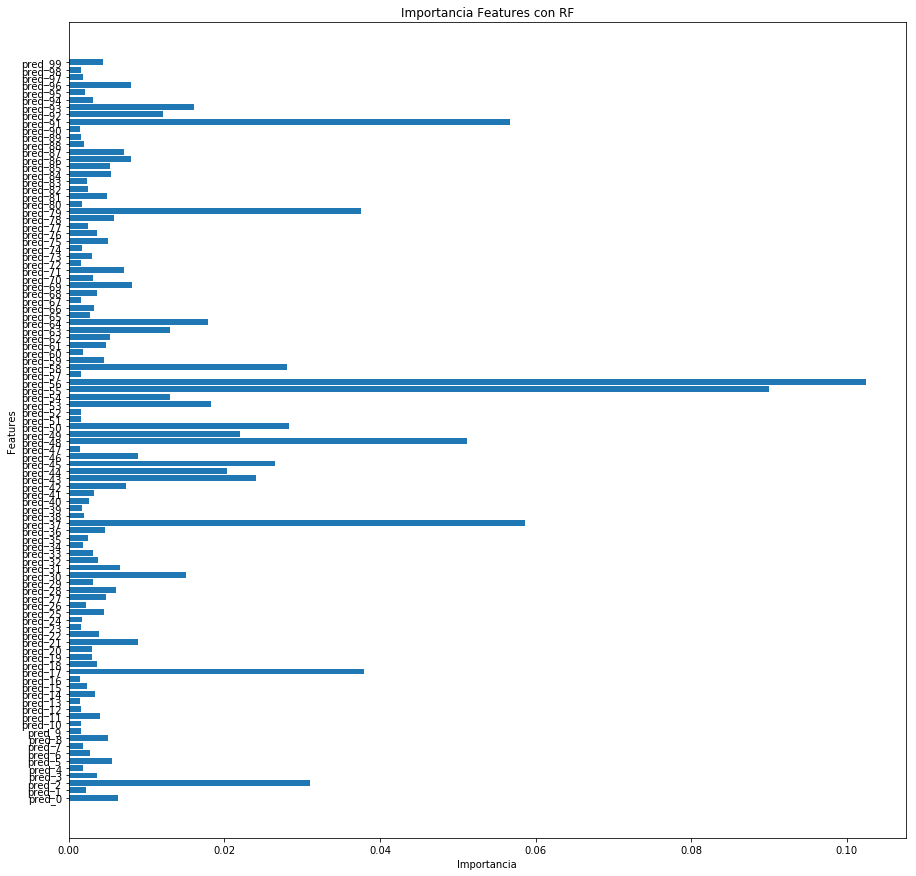

In [49]:
plt.figure(figsize = (15,15))
plt.barh(RF_train.columns, model_RF.feature_importances_)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia Features con RF')
plt.show()

# Se genera el archivo para subir a Kaggle

In [50]:
test_set = pd.read_csv("test_set_xgb.csv")

In [51]:
test_set.columns

Index(['id', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'tipodepropiedad_1', 'tipodepropiedad_2',
       'tipodepropiedad_3', 'tipodepropiedad_4', 'tipodepropiedad_5',
       'tipodepropiedad_6', 'tipodepropiedad_7', 'tipodepropiedad_8',
       'tipodepropiedad_9', 'tipodepropiedad_10', 'tipodepropiedad_11',
       'tipodepropiedad_12', 'tipodepropiedad_13', 'tipodepropiedad_14',
       'tipodepropiedad_15', 'tipodepropiedad_16', 'tipodepropiedad_17',
       'tipodepropiedad_18', 'tipodepropiedad_19', 'tipodepropiedad_20',
       'tipodepropiedad_21', 'tipodepropiedad_22', 'tipodepropiedad_23',
       'tipodepropiedad_24', 'tipodepropiedad_25', 'provincia_1',
       'provincia_2', 'provincia_3', 'provincia_4', 'provincia_5',
       'provincia_6', 'provincia_7', 'provincia_8', 'provincia_9',
       'provincia_10

In [52]:
X_test_set = test_set.loc[:, test_set.columns != 'id']

## Armo el DF con las predicciones de test

In [53]:
RF_test_set = pd.DataFrame(index = test_set.index.copy())

In [54]:
for i in range(n):
    current_price_pred = xgb_created[i].predict(X_test_set)
    RF_test_set['pred_{}'.format(i)] = current_price_pred
    print("xgb_{} finished pred".format(i))
RF_test_set.head()

xgb_0 finished pred
xgb_1 finished pred
xgb_2 finished pred
xgb_3 finished pred
xgb_4 finished pred
xgb_5 finished pred
xgb_6 finished pred
xgb_7 finished pred
xgb_8 finished pred
xgb_9 finished pred
xgb_10 finished pred
xgb_11 finished pred
xgb_12 finished pred
xgb_13 finished pred
xgb_14 finished pred
xgb_15 finished pred
xgb_16 finished pred
xgb_17 finished pred
xgb_18 finished pred
xgb_19 finished pred
xgb_20 finished pred
xgb_21 finished pred
xgb_22 finished pred
xgb_23 finished pred
xgb_24 finished pred
xgb_25 finished pred
xgb_26 finished pred
xgb_27 finished pred
xgb_28 finished pred
xgb_29 finished pred
xgb_30 finished pred
xgb_31 finished pred
xgb_32 finished pred
xgb_33 finished pred
xgb_34 finished pred
xgb_35 finished pred
xgb_36 finished pred
xgb_37 finished pred
xgb_38 finished pred
xgb_39 finished pred
xgb_40 finished pred
xgb_41 finished pred
xgb_42 finished pred
xgb_43 finished pred
xgb_44 finished pred
xgb_45 finished pred
xgb_46 finished pred
xgb_47 finished pred
xg

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,...,pred_90,pred_91,pred_92,pred_93,pred_94,pred_95,pred_96,pred_97,pred_98,pred_99
0,5.929443e+06,6.422951e+06,6.331524e+06,6208202.500,6.079138e+06,6.138976e+06,6.026108e+06,6.212712e+06,6.110819e+06,5854841.500,...,6.638941e+06,6.152992e+06,6.401341e+06,6755257.000,6694698.000,6192720.000,6.406754e+06,5.975076e+06,6.192633e+06,6165592.500
1,9.989693e+05,8.322870e+05,9.295520e+05,914281.625,9.255054e+05,8.812489e+05,8.896313e+05,1.118587e+06,9.902378e+05,929742.375,...,8.429013e+05,6.832974e+05,7.365469e+05,1094880.125,844843.250,934116.625,7.924654e+05,7.692512e+05,1.114111e+06,858194.125
2,2.313910e+06,2.266260e+06,2.387846e+06,2063077.000,2.348831e+06,2.253302e+06,2.333052e+06,2.265750e+06,2.205707e+06,2330729.250,...,2.301837e+06,2.223638e+06,2.227366e+06,2243585.000,2266815.000,2333668.500,2.303918e+06,2.256296e+06,2.386876e+06,2446797.000
3,1.273427e+06,1.414322e+06,1.394382e+06,1308210.625,1.238974e+06,1.389520e+06,1.400427e+06,1.392777e+06,1.361627e+06,1322896.250,...,1.223016e+06,1.144590e+06,1.382689e+06,1207397.625,1310405.875,1445659.000,1.439355e+06,1.329882e+06,1.425926e+06,1328596.250
4,5.950764e+05,4.986707e+05,4.704719e+05,540856.750,5.011728e+05,5.699128e+05,5.598578e+05,4.781462e+05,4.860857e+05,553789.250,...,4.503276e+05,6.014804e+05,5.410101e+05,578865.375,547976.375,509823.375,5.010248e+05,5.423953e+05,4.636610e+05,455844.250


In [55]:
pred_a_kaggle = model_RF.predict(RF_test_set)

In [56]:
df_a_kaggle = pd.DataFrame()
df_a_kaggle['id'] = test_set['id']
df_a_kaggle['target'] = pred_a_kaggle
df_a_kaggle.head()

,id,target
0,4941,6.444731e+06
1,51775,9.792159e+05
2,115253,2.296261e+06
3,299321,1.281643e+06
4,173570,5.555536e+05


In [57]:
df_a_kaggle.to_csv("subir_a_kaggle", header = True, index = False)